In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('./UrbanEdgeApparel.csv')

# Perform exploratory analysis
# For example, you can print the first few rows of the DataFrame
print(df.head())

   Order ID Order Status Order Date Order Day of Week Order Month  Order Year  \
0       104    Completed   6/6/2013          Thursday        June      2013.0   
1       104    Completed   6/6/2013          Thursday        June      2013.0   
2       107    Completed   6/6/2013          Thursday        June      2013.0   
3       107    Completed   6/6/2013          Thursday        June      2013.0   
4       107    Completed   6/6/2013          Thursday        June      2013.0   

  Customer ID     Company ID  Product ID Product Variant ID  ...  \
0   Cust_3161  Company_87239   Prod_5030     Prod_Var_50300  ...   
1   Cust_3161  Company_87239  Prod_70018     Prod_Var_70018  ...   
2   Cust_2040  Company_83024   Prod_1000     Prod_Var_10003  ...   
3   Cust_2040  Company_83024   Prod_1000     Prod_Var_10004  ...   
4   Cust_2040  Company_83024   Prod_1000     Prod_Var_10005  ...   

   Product Quantity  Total Selling Price  Payment Status Shipment ID  \
0                50             

In [2]:
df['Product Unit Selling Price'].describe()

count    89644.000000
mean         6.723333
std          5.628675
min          0.000000
25%          3.300000
50%          4.750000
75%          8.500000
max        150.000000
Name: Product Unit Selling Price, dtype: float64

In [3]:
df['Order Status'].value_counts()

Completed    87163
Canceled      1240
Process       1113
Failed         128
Name: Order Status, dtype: int64

In [4]:
df['Payment Status'].value_counts()

Received    82858
Pending      5601
Canceled     1046
Declined      139
Name: Payment Status, dtype: int64

In [5]:
df[ df['Order Status'] == 'Process' ]['Payment Status'].value_counts()

Pending     1079
Received      34
Name: Payment Status, dtype: int64

For our analysis, only successfully paid orders with valid order date are considered.

In [6]:
df_valid = df[ (df['Order Status'] == 'Completed') & (df['Payment Status'] == 'Received') ]
df_valid


,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Variant ID,...,Product Quantity,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country
0,104,Completed,6/6/2013,Thursday,June,2013.0,Cust_3161,Company_87239,Prod_5030,Prod_Var_50300,...,50,215.00,Received,271,271,Business,Washington,District Of Columbia,20011-2343,United States
1,104,Completed,6/6/2013,Thursday,June,2013.0,Cust_3161,Company_87239,Prod_70018,Prod_Var_70018,...,50,75.00,Received,271,271,Business,Washington,District Of Columbia,20011-2343,United States
2,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10003,...,1,3.95,Received,438,438,Business,Lone Tree,Colorado,80124,United States
3,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10004,...,1,3.95,Received,438,438,Business,Lone Tree,Colorado,80124,United States
4,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10005,...,2,7.90,Received,438,438,Business,Lone Tree,Colorado,80124,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89639,9257,Completed,12/31/2021,Friday,December,2021.0,Cust_2011,Company_42529,Prod_5100,Prod_Var_51002,...,15,45.00,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89640,9257,Completed,12/31/2021,Friday,December,2021.0,Cust_2011,Company_42529,Prod_5060,Prod_Var_50606,...,4,34.00,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89641,9257,Completed,12/31/2021,Friday,December,2021.0,Cust_2011,Company_42529,Prod_5060,Prod_Var_50609,...,2,17.00,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89642,9257,Completed,12/31/2021,Friday,December,2021.0,Cust_2011,Company_42529,Prod_5060,Prod_Var_50607,...,6,66.00,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States


# Data Cleaning

In [7]:
null_data = df_valid[df_valid.isnull().any(axis=1)]
print(null_data)

       Order ID Order Status  Order Date Order Day of Week Order Month  \
16          109    Completed    9/2/2013            Monday   September   
214          13    Completed   4/24/2013         Wednesday       April   
280         445    Completed   1/23/2014          Thursday     January   
281         445    Completed   1/23/2014          Thursday     January   
282         445    Completed   1/23/2014          Thursday     January   
...         ...          ...         ...               ...         ...   
89604      9252    Completed  12/30/2021          Thursday    December   
89605      9255    Completed  12/31/2021            Friday    December   
89606      9255    Completed  12/31/2021            Friday    December   
89611      9256    Completed  12/31/2021            Friday    December   
89635      9256    Completed  12/31/2021            Friday    December   

       Order Year Customer ID     Company ID  Product ID Product Variant ID  \
16         2013.0   Cust_2941  C

There are null value in the dataset.

In [8]:
null_columns = df_valid.columns[df.isnull().any()]
print(null_columns)

Index(['Order Date', 'Order Day of Week', 'Order Month', 'Order Year',
       'Company ID', 'Product Variant ID', 'Shipping City', 'Shipping State',
       'Shipping Postal Code', 'Shipping Country'],
      dtype='object')


We found even though there is NaN value in column 'Product Variant ID', it is still legit for our analysis.

Thus, we only filtered out those with missing order date

In [10]:
# null_data = df_valid[df_valid['Shipping Postal Code'].isnull()]

In [284]:
# null_data

In [9]:
df_clean = df_valid.dropna(subset=['Order Date', 'Shipping Country'])
print(df_clean)

df_clean.to_csv('./UrbanEdgeApparel_clean.csv', index=False)

       Order ID Order Status  Order Date Order Day of Week Order Month  \
0           104    Completed    6/6/2013          Thursday        June   
1           104    Completed    6/6/2013          Thursday        June   
2           107    Completed    6/6/2013          Thursday        June   
3           107    Completed    6/6/2013          Thursday        June   
4           107    Completed    6/6/2013          Thursday        June   
...         ...          ...         ...               ...         ...   
89639      9257    Completed  12/31/2021            Friday    December   
89640      9257    Completed  12/31/2021            Friday    December   
89641      9257    Completed  12/31/2021            Friday    December   
89642      9257    Completed  12/31/2021            Friday    December   
89643      9257    Completed  12/31/2021            Friday    December   

       Order Year Customer ID     Company ID  Product ID Product Variant ID  \
0          2013.0   Cust_3161  C

In [66]:
# order_month_summary = df_valid['Shipping Country'].value_counts()
# print(order_month_summary)

United States                           80760
Japan                                    1278
United States Minor Outlying Islands      113
Virgin Islands (US)                       107
Brunei Darussalam                          76
Germany                                    45
Singapore                                  40
United Kingdom                             40
Nigeria                                    39
Dominican Republic                         36
Tanzania, United Republic Of               35
Guam                                       32
Gibraltar                                  28
Guatemala                                  27
Suriname                                   20
Russian Federation                         18
South Africa                               10
Lebanon                                     9
Peru                                        9
Hong Kong                                   3
Israel                                      2
Canada                            

In [10]:
df_clean_timed = df_clean[(df_clean['Order Year'] > 2013) & (df_clean['Order Year'] < 2024)]


Further format data for further analysis

In [11]:
df_clean_timed['Order Year'] = df_clean_timed['Order Year'].astype(int)

/Users/zhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_clean_timed

,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Variant ID,...,Product Quantity,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country
248,444,Completed,1/23/2014,Thursday,January,2014,Cust_2477,Company_89552,Prod_2600,Prod_Var_26010,...,16,72.0,Received,1126,1126,Business,Roseville,California,95678,United States
249,444,Completed,1/23/2014,Thursday,January,2014,Cust_2477,Company_89552,Prod_2600,Prod_Var_26011,...,25,112.5,Received,1126,1126,Business,Roseville,California,95678,United States
250,444,Completed,1/23/2014,Thursday,January,2014,Cust_2477,Company_89552,Prod_2600,Prod_Var_26012,...,12,54.0,Received,1126,1126,Business,Roseville,California,95678,United States
251,444,Completed,1/23/2014,Thursday,January,2014,Cust_2477,Company_89552,Prod_2600,Prod_Var_26002,...,4,18.0,Received,1126,1126,Business,Roseville,California,95678,United States
252,444,Completed,1/23/2014,Thursday,January,2014,Cust_2477,Company_89552,Prod_2600,Prod_Var_26006,...,1,4.5,Received,1126,1126,Business,Roseville,California,95678,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89639,9257,Completed,12/31/2021,Friday,December,2021,Cust_2011,Company_42529,Prod_5100,Prod_Var_51002,...,15,45.0,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89640,9257,Completed,12/31/2021,Friday,December,2021,Cust_2011,Company_42529,Prod_5060,Prod_Var_50606,...,4,34.0,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89641,9257,Completed,12/31/2021,Friday,December,2021,Cust_2011,Company_42529,Prod_5060,Prod_Var_50609,...,2,17.0,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States
89642,9257,Completed,12/31/2021,Friday,December,2021,Cust_2011,Company_42529,Prod_5060,Prod_Var_50607,...,6,66.0,Received,12908,12908,Residential,Raleigh,North Carolina,27609,United States


# Data Exploration

In [143]:
df_clean_timed['Shipping Address Type'].value_counts()

Residential    46838
Business       30640
Name: Shipping Address Type, dtype: int64

Group by Order

In [289]:
df_order = df_clean_timed[['Order ID', 'Company ID', 'Customer ID', 'Order Year', 'Order Month', 'Total Selling Price']].drop_duplicates()
df_order


,Order ID,Company ID,Customer ID,Order Year,Order Month,Total Selling Price
248,444,Company_89552,Cust_2477,2014,January,72.0
249,444,Company_89552,Cust_2477,2014,January,112.5
250,444,Company_89552,Cust_2477,2014,January,54.0
251,444,Company_89552,Cust_2477,2014,January,18.0
252,444,Company_89552,Cust_2477,2014,January,4.5
...,...,...,...,...,...,...
89637,9257,Company_42529,Cust_2011,2021,December,80.0
89638,9257,Company_42529,Cust_2011,2021,December,30.0
89639,9257,Company_42529,Cust_2011,2021,December,45.0
89642,9257,Company_42529,Cust_2011,2021,December,66.0


Segment by seasons

In [290]:
month2season = lambda x: 'Winter' if x in ['December', 'January', 'Febuary'] else 'Spring' if x in ['March', "April", 'May'] else 'Summer' if x in ['June', 'July', 'August'] else 'Fall'
df_order['Season'] = df_order['Order Month'].apply(month2season)

total_selling_price_season = df_order.groupby(['Order Year', 'Season'])['Total Selling Price'].sum()
total_selling_price_season.to_csv('./total_selling_price_season.csv', header=True)

Repeat sales

In [148]:
freq = df_order['Customer ID'].value_counts()
freq.describe()

count    2026.000000
mean       27.624877
std       146.010196
min         1.000000
25%         1.000000
50%         3.000000
75%        12.000000
max      3803.000000
Name: Customer ID, dtype: float64

In [100]:
# import matplotlib.pyplot as plt


# # Plotting the frequency distribution
# plt.hist(freq, bins=30)
# plt.xlabel('Purchase Frequency')
# plt.ylabel('Count of Customers')
# plt.title('Count of Customers by Purchase Frequency')
# plt.show()

To better visualize,

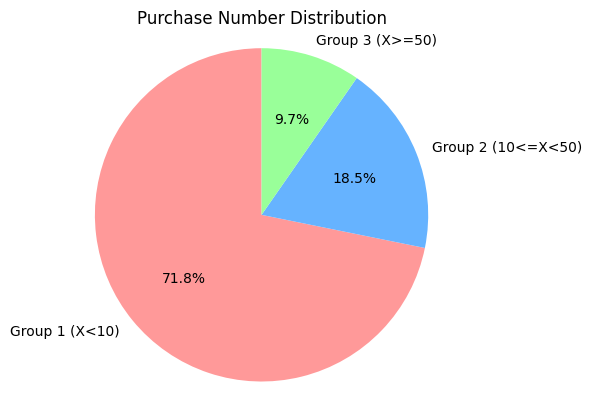

In [149]:
import matplotlib.pyplot as plt

# Define the labels for the pie chart
labels = ['Group 1 (X<10)', 'Group 2 (10<=X<50)', 'Group 3 (X>=50)']

# Define the sizes for each group
sizes = [freq[freq < 10].count(), freq[(freq >= 10) & (freq < 50)].count(), freq[freq >= 50].count()]

# Define the colors for each group
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Purchase Number Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

Average Purchase Value per Company measures how much a company spend on each order in average

Average Purchase Value = (total revenue over a set time frame / number of purchases over the same time frame)

avg_purchase_value_per_company = df_clean.groupby(['Order ID', 'Company ID'])['Total Selling Price'].sum().groupby('Company ID').mean()

In [97]:
avg_purchase_value_per_company = df_clean_timed.groupby(['Order ID', 'Company ID'])['Total Selling Price'].sum().groupby(['Company ID']).mean()
avg_purchase_value_per_company.describe()

count     923.000000
mean      314.955995
std       466.294023
min         5.000000
25%       158.933333
50%       215.450000
75%       308.351316
max      8760.887209
Name: Total Selling Price, dtype: float64

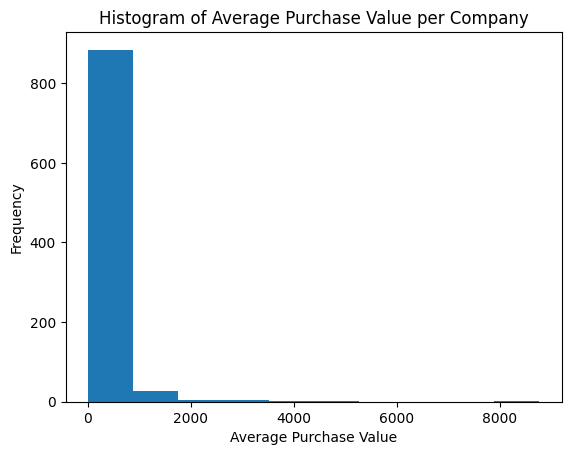

In [96]:
import matplotlib.pyplot as plt

# Assuming avg_purchase_value_per_company is a pandas Series
plt.hist(avg_purchase_value_per_company, bins=10)

plt.title('Histogram of Average Purchase Value per Company')
plt.xlabel('Average Purchase Value')
plt.ylabel('Frequency')

plt.show()

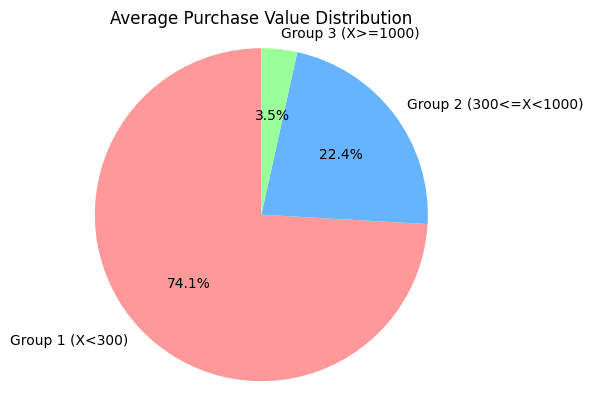

In [98]:
import matplotlib.pyplot as plt

# Define the labels for the pie chart
labels = ['Group 1 (X<300)', 'Group 2 (300<=X<1000)', 'Group 3 (X>=1000)']

# Define the sizes for each group
sizes = [avg_purchase_value_per_company[avg_purchase_value_per_company < 300].count(), 
         avg_purchase_value_per_company[(avg_purchase_value_per_company >= 300) & (avg_purchase_value_per_company < 1000)].count(), 
         avg_purchase_value_per_company[avg_purchase_value_per_company >= 1000].count()]

# Define the colors for each group
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Average Purchase Value Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [101]:
avg_purchase_value_per_company_yearly = df_clean_timed.groupby(['Order ID', 'Company ID', 'Order Year'])['Total Selling Price'].sum().groupby(['Company ID', 'Order Year']).mean()
avg_purchase_value_per_company_yearly.to_csv('./avg_purchase_value_per_company_yearly.csv')

In [102]:
avg_purchase_value_per_company_yearly

Company ID     Order Year
Company_10049  2023.0        204.00
Company_1021   2022.0        391.52
               2023.0        629.20
Company_10257  2023.0         47.00
Company_10269  2023.0        201.00
                              ...  
Company_9598   2023.0         44.00
Company_9739   2023.0         10.00
Company_9761   2019.0        525.85
               2021.0        781.85
               2023.0        862.95
Name: Total Selling Price, Length: 2523, dtype: float64

In [91]:
avg_purchase_value_per_company_yearly.groupby('Order Year').mean().to_csv('./avg_purchase_value_yearly.csv')

Average purchase frequency per year = (total number of purchases over a period / number of customers during that same period) 

Average purchase frequency per Company measures how frequent a company purchase each year
= (total number of purchases over a period / number of customers during that same period) 

In [123]:
total_purchase_count_per_company = df_order.groupby(['Company ID'])['Order ID'].nunique()
total_purchase_count_per_company_yearly = df_clean_timed.groupby(['Company ID', 'Order Year'])['Order ID'].nunique()

acquire_year = df_clean_timed.groupby('Company ID')['Order Year'].min()

merge_df = pd.merge(total_purchase_count_per_company, acquire_year, on='Company ID')

merge_df['yearly_avg_purchase_freq_per_company'] = merge_df['Order ID'] / (2024 - merge_df['Order Year'])


In [124]:
merge_df

,Order ID,Order Year,yearly_avg_purchase_freq_per_company
Company ID,,,
Company_10049,1,2023.0,1.000000
Company_1021,7,2022.0,3.500000
Company_10257,1,2023.0,1.000000
Company_10269,1,2023.0,1.000000
Company_10511,6,2021.0,2.000000
...,...,...,...
Company_94837,1,2015.0,0.111111
Company_9486,4,2021.0,1.333333
Company_9598,1,2023.0,1.000000


In [126]:
merge_df['yearly_avg_purchase_freq_per_company'].describe()

count    923.000000
mean       1.400990
std        9.380265
min        0.100000
25%        0.200000
50%        0.500000
75%        1.100000
max      279.000000
Name: yearly_avg_purchase_freq_per_company, dtype: float64

# Basket size

In [282]:
df_basket_year = df_clean_timed.groupby(['Order ID', 'Customer ID', 'Order Year'])['Product ID'].nunique().groupby(['Order Year']).mean()
df_basket_year_per_customer = df_clean_timed.groupby(['Order ID', 'Customer ID', 'Order Year'])['Product ID'].nunique().groupby(['Order Year', 'Customer ID']).mean()


df_basket_year.head()

Order Year
2014    6.903475
2015    6.473577
2016    5.844482
2017    5.622396
2018    5.216745
Name: Product ID, dtype: float64

In [283]:
df_basket_year.to_csv('./avg_basket_size_yearly.csv')
df_basket_year_per_customer.to_csv('./avg_basket_size_yearly_per_customer.csv')

## Customer Value (Company)

In [128]:
customer_value = merge_df['yearly_avg_purchase_freq_per_company'] * avg_purchase_value_per_company
customer_value.describe()

count       923.000000
mean        759.608513
std        5286.806661
min           2.500000
25%          38.816667
50%         102.520000
75%         311.398611
max      107845.210000
dtype: float64

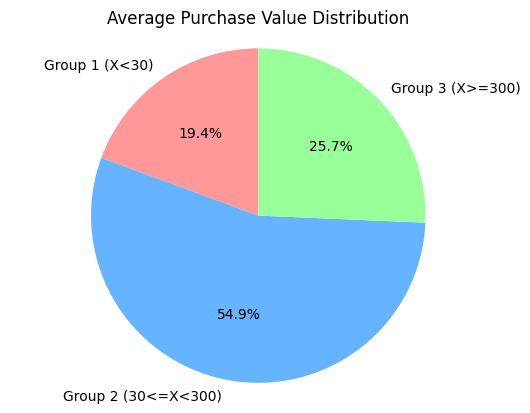

In [140]:
import matplotlib.pyplot as plt

# Define the labels for the pie chart
labels = ['Group 1 (X<30)', 'Group 2 (30<=X<300)', 'Group 3 (X>=300)']

# Define the sizes for each group
sizes = [customer_value[customer_value < 30].count(), 
         customer_value[(customer_value >= 30) & (customer_value < 300)].count(), 
         customer_value[customer_value >= 300].count(), ]

# Define the colors for each group
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Average Purchase Value Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

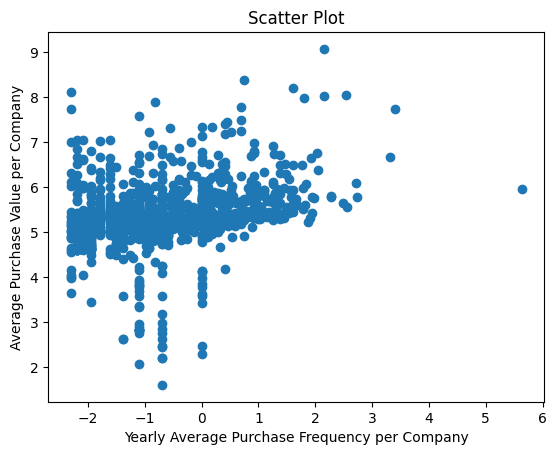

In [142]:
import matplotlib.pyplot as plt

# Assuming merge_df is the DataFrame containing the data
x = np.log(merge_df['yearly_avg_purchase_freq_per_company'])
y = np.log(avg_purchase_value_per_company)

# Create the scatter plot
plt.scatter(x, y)

# Set the labels and title
plt.xlabel('Yearly Average Purchase Frequency per Company')
plt.ylabel('Average Purchase Value per Company')
plt.title('Scatter Plot')

# Show the plot
plt.show()

# Customer Segmentation: RFM Analysis

In [216]:
from datetime import datetime

# Convert 'Order Date' to datetime format
df_clean_timed['Order Date'] = pd.to_datetime(df_clean_timed['Order Date'])
# df_clean_timed['Acquire_year'] = df_clean_timed.groupby('Company ID')['Order Year'].transform('min')

# Assuming the current date is the maximum date in the dataset plus one day
current_date = df_clean_timed['Order Date'].max() + pd.Timedelta(days=1)

# Group data by customer ID to calculate RFM metrics
rfm = df_clean_timed.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency: days since last purchase
    'Order ID': 'nunique',  # Frequency: count of unique transactions
    'Total Selling Price': 'sum',  # Monetary: sum of total spending
    'Order Year': lambda x: (current_date.year - x.min()) + 1,
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Total Selling Price': 'Monetary',
    'Order Year': 'AcquireTime'
})

# Adjust Frequency calculation
rfm['Frequency'] = rfm['Frequency'] / rfm['AcquireTime']


# Display the first few rows of the RFM DataFrame
rfm.head()


/Users/zhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Recency,Frequency,Monetary,AcquireTime
Customer ID,,,,
Cust_1004,289,1.000000,12.00,1.0
Cust_1005,103,2.400000,9628.15,5.0
Cust_1006,1069,0.333333,17.00,3.0
Cust_1007,969,0.333333,13.36,3.0
Cust_1008,1408,0.750000,2217.58,8.0


In [217]:
rfm

,Recency,Frequency,Monetary,AcquireTime
Customer ID,,,,
Cust_1004,289,1.000000,12.00,1.0
Cust_1005,103,2.400000,9628.15,5.0
Cust_1006,1069,0.333333,17.00,3.0
Cust_1007,969,0.333333,13.36,3.0
Cust_1008,1408,0.750000,2217.58,8.0
...,...,...,...,...
Cust_3351,2503,0.142857,150.90,7.0
Cust_3352,1889,0.250000,667.10,8.0
Cust_3353,560,0.500000,12.00,2.0


Segment customers based on RFM metrics

In [218]:
rfm['Recency'].describe()

count    2026.000000
mean      966.152517
std       882.066431
min         1.000000
25%       269.250000
50%       692.500000
75%      1197.500000
max      3648.000000
Name: Recency, dtype: float64

In [262]:
rfm['Recency Cell'] = rfm['Recency'].apply(lambda x: '1' if x <= 365 else '2' if x <= 730 else '3' if x <= 1095 else '4')
rfm['Recency Score'] = pd.qcut(rfm['Recency'], q=4, labels=False)
# Assuming rfm is your RFM dataset
rfm['Recency p']= rfm['Recency'].rank(pct=True) * 100

In [220]:
rfm['Frequency'].describe()

count    2026.000000
mean        1.005288
std         6.354169
min         0.100000
25%         0.333333
50%         0.500000
75%         1.000000
max       279.000000
Name: Frequency, dtype: float64

In [254]:
rfm['Freq Cell'] = rfm['Frequency'].apply(lambda x: '1' if x <= 2 else '2' if x <= 200 else '3')
# Assuming 'Frequency' is a pandas Series

In [261]:
# Assuming rfm is your RFM dataset
rfm['Freq p']= rfm['Frequency'].rank(pct=True) * 100


In [234]:
rfm['Freq Score'] = 3 - pd.qcut(rfm['Frequency'], q=4, labels=False)
rfm['Freq Score'].describe()

count    2026.000000
mean        1.830701
std         1.083873
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Freq Score, dtype: float64

In [224]:
rfm['Monetary'].describe()

count      2026.000000
mean       2545.800489
std       30211.240039
min           2.000000
25%          21.000000
50%          70.485000
75%         490.350000
max      754916.470000
Name: Monetary, dtype: float64

In [260]:
rfm['Monetary Cell'] = rfm['Monetary'].apply(lambda x: '1' if x <= 30 else '2' if x <= 3000 else '3')
rfm['Monetary Score'] = 3 - pd.qcut(rfm['Monetary'], q=4, labels=False)
# Assuming rfm is your RFM dataset
rfm['Monetary p']= rfm['Monetary'].rank(pct=True) * 100
rfm['Monetary'].describe()

count      2026.000000
mean       2545.800489
std       30211.240039
min           2.000000
25%          21.000000
50%          70.485000
75%         490.350000
max      754916.470000
Name: Monetary, dtype: float64

Segment into 6 groups

In [251]:
rfm['RFM Score'] = rfm['Recency Score'] * 100 + rfm['Freq Score'] * 10 + rfm['Monetary Score']

def rfm_group(df):
    if df['RFM Score'] == 0:
        return 'Core'
    elif df['Freq Score'] == 0:
        return 'Loyal'
    elif df['Freq Score'] <= 1 and df['Monetary Score'] == 2:
        return 'Promising'
    elif df['Freq Score'] <= 1 and df['Monetary Score'] == 3:
        return 'Promising'
    elif df['Monetary Score'] == 0:
        return 'Whales'
    elif df['Recency Score'] <= 1 and df['Freq Score'] == 3:
        return 'Rookies'
    elif df['Recency Score'] == 3 and df['Freq Score'] == 3:
        return 'Slipping'
    else:
        return 'Low Value'
    
rfm['RFM Group'] = rfm.apply(rfm_group, axis=1)

In [247]:
rfm['RFM Score'].value_counts()

331    285
232    188
233    164
13     157
0      155
123    132
122    121
12     105
330     52
113     50
310     49
320     48
231     46
110     42
111     37
100     37
11      34
121     32
112     32
300     30
10      23
332     23
210     22
200     17
1       17
321     14
221     13
222     13
220     12
211     12
120      9
101      9
212      7
333      6
223      6
2        6
20       5
230      4
131      3
21       2
31       1
201      1
22       1
30       1
130      1
102      1
213      1
Name: RFM Score, dtype: int64

In [252]:
rfm['RFM Group'].value_counts()

Low Value    815
Promising    352
Slipping     314
Whales       268
Core         155
Loyal        118
Rookies        4
Name: RFM Group, dtype: int64

In [263]:
rfm.to_csv('./rfm.csv')
# rfm.to_excel('./rfm.xlsx')


## Other tasks

Illustrate the relationship between the number of orders and the total revenue generated per customer.

In [108]:
num_purchase_per_company = df_order.groupby('Company ID').size()
num_purchase_per_company.describe()


count     923.000000
mean        9.253521
std        66.064130
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      1953.000000
dtype: float64

In [110]:
total_revenue_per_company = df_clean_timed.groupby('Company ID')['Total Selling Price'].sum()
total_revenue_per_company.describe()

count       923.000000
mean       5479.428104
std       43722.580037
min           5.000000
25%         214.125000
50%         581.250000
75%        1996.350000
max      754916.470000
Name: Total Selling Price, dtype: float64

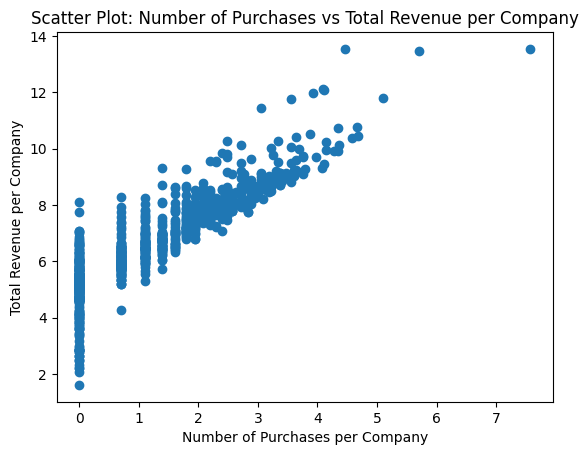

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data stored in two separate variables

# Create the scatter plot
plt.scatter(np.log(num_purchase_per_company), np.log(total_revenue_per_company))

# Set the labels and title
plt.xlabel('Number of Purchases per Company')
plt.ylabel('Total Revenue per Company')
plt.title('Scatter Plot: Number of Purchases vs Total Revenue per Company')

# Show the plot
plt.show()